**Problem 1 Tree Definitions**

We have 7 different definitions of a tree. The idea is that they all describe
the same type of graph:

- A tree is **connected** and has **no cycles**.

- A forest is just “many trees”, so **one component of a forest** is a tree.
- A connected graph cannot have less than $V-1$ edges, and if it has more than
  $V-1$ edges, there must be a cycle. So a connected acyclic graph has exactly
  $V-1$ edges.
- **Minimally connected** means: if you remove any edge, the graph becomes
  disconnected. This is true for trees, because every edge lies on the unique
  path between its endpoints.
- **Maximally acyclic** means: if you add any new edge, you create a cycle.
  This is also true for trees, because there is already a unique path between
  any two vertices.
- **Unique path** between each pair of vertices is another way to say
  “connected and acyclic”: connected gives at least one path, acyclic forbids
  two different simple paths.

So in the end, all 7 points are just different faces of the same idea:
**a tree is a connected acyclic graph with $V-1$ edges and unique paths.**

**Problem 2 – CSC Graphs and Adjacency Matrices**

**2.1 Helper functions**

In [61]:
import numpy as np

def csc_to_adj_undirected(n, col_pointers, row_indices):
    adj = np.zeros((n, n), dtype=int)
    for col in range(n):
        start = col_pointers[col]
        end = col_pointers[col+1]
        for idx in range(start, end):
            row = row_indices[idx]
            adj[row, col] = 1
            adj[col, row] = 1
    return adj

def csc_to_adj_directed(n, col_pointers, row_indices):
    adj = np.zeros((n, n), dtype=int)
    for col in range(n):
        start = col_pointers[col]
        end = col_pointers[col+1]
        for idx in range(start, end):
            row = row_indices[idx]
            adj[row, col] = 1
    return adj


**2.2 Graph 1 (undirected) adjacency matrix**

In [64]:
n = 5
labels = ['A','B','C','D','E']

col_pointers_g1 = [0, 2, 5, 8, 11, 12]
row_indices_g1 = [1, 2, 0, 2, 3, 0, 1, 3, 1, 2, 4, 3]

adj_g1 = csc_to_adj_undirected(n, col_pointers_g1, row_indices_g1)

print('Adjacency matrix for Graph 1 (undirected):')
print('    ' + '  '.join(labels))
for i in range(n):
    row = '  '.join(str(x) for x in adj_g1[i])
    print(f"{labels[i]} [ {row} ]")

Adjacency matrix for Graph 1 (undirected):
    A  B  C  D  E
A [ 0  1  1  0  0 ]
B [ 1  0  1  1  0 ]
C [ 1  1  0  1  0 ]
D [ 0  1  1  0  1 ]
E [ 0  0  0  1  0 ]


**2.3 Graph 2 (directed) – adjacency matrix**

In [67]:
col_pointers_g2 = [0, 0, 2, 4, 5, 7]
row_indices_g2 = [0, 3, 0, 1, 2, 1, 3]

adj_g2 = csc_to_adj_directed(n, col_pointers_g2, row_indices_g2)

print('Adjacency matrix for Graph 2 (directed):')
print('    ' + '  '.join(labels))
for i in range(n):
    row = '  '.join(str(x) for x in adj_g2[i])
    print(f"{labels[i]} [ {row} ]")

Adjacency matrix for Graph 2 (directed):
    A  B  C  D  E
A [ 0  1  1  0  0 ]
B [ 0  0  1  0  1 ]
C [ 0  0  0  1  0 ]
D [ 0  1  0  0  1 ]
E [ 0  0  0  0  0 ]


**2.4 Edge list and one directed cycle in Graph 2**

In [70]:
edges = []
for i in range(n):
    for j in range(n):
        if adj_g2[i,j] == 1:
            edges.append((labels[i], labels[j]))

print('Directed edges in Graph 2:')
for u,v in edges:
    print(f"{u} -> {v}")

cycle = ['C','D','B','C']
print('\nOne directed cycle: ' + ' -> '.join(cycle))

Directed edges in Graph 2:
A -> B
A -> C
B -> C
B -> E
C -> D
D -> B
D -> E

One directed cycle: C -> D -> B -> C


**2.5 Visualizing**

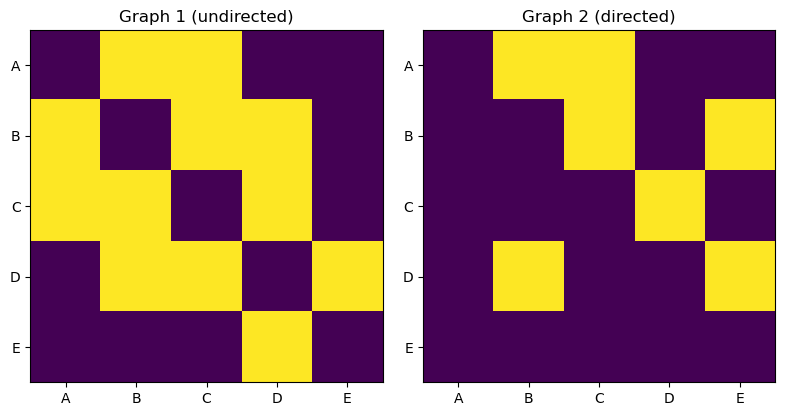

In [73]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8,4))

axes[0].imshow(adj_g1)
axes[0].set_title('Graph 1 (undirected)')
axes[0].set_xticks(range(n)); axes[0].set_yticks(range(n))
axes[0].set_xticklabels(labels); axes[0].set_yticklabels(labels)

axes[1].imshow(adj_g2)
axes[1].set_title('Graph 2 (directed)')
axes[1].set_xticks(range(n)); axes[1].set_yticks(range(n))
axes[1].set_xticklabels(labels); axes[1].set_yticklabels(labels)

plt.tight_layout()
plt.show()

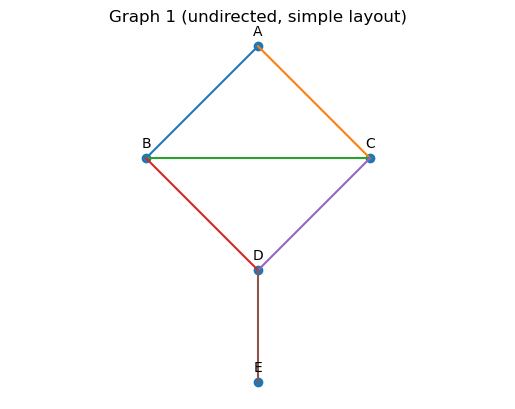

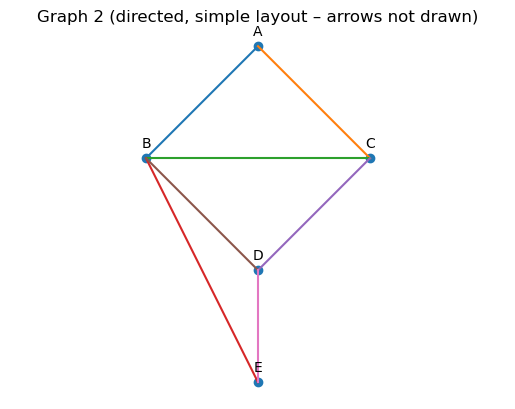

In [75]:

pos = {
    'A': (0, 1),
    'B': (-1, 0),
    'C': (1, 0),
    'D': (0, -1),
    'E': (0, -2)
}

def draw_graph(edges, title):
    plt.figure()

    xs = [pos[v][0] for v in labels]
    ys = [pos[v][1] for v in labels]
    plt.scatter(xs, ys)
    for v in labels:
        x, y = pos[v]
        plt.text(x, y+0.1, v, ha='center')

    for u, v in edges:
        x1, y1 = pos[u]
        x2, y2 = pos[v]
        plt.plot([x1, x2], [y1, y2])

    plt.title(title)
    plt.axis('equal')
    plt.axis('off')
    plt.show()
edges_g1 = []
for i in range(n):
    for j in range(i+1, n):
        if adj_g1[i,j]==1:
            edges_g1.append((labels[i], labels[j]))

draw_graph(edges_g1, 'Graph 1 (undirected, simple layout)')

draw_graph(edges, 'Graph 2 (directed, simple layout – arrows not drawn)')

**Conclusion**


Using Python I reconstructed adjacency matrices from CSC, printed edges, found one directed cycle in Graph 2 (C -> D -> B -> C) and added small visualizations (matrix images and simple node layouts).